Get the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [9]:
data = loadmat('D:/ProgrammingBook/AndrewNg/ex3data1.mat')
data["X"].shape, data["y"].shape

((5000, 400), (5000, 1))

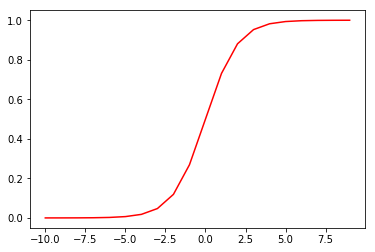

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
example_x = np.arange(-10,10,step=1)
example_y = sigmoid(example_x)
plt.plot(example_x, example_y,c='r')
plt.show()

In [11]:
def cost(theta, x ,y, lambda_):
    theta = np.expand_dims(theta, axis = 1)
    product = np.dot(x,theta)
    hypo1 = sigmoid(product)
    hypo2 = 1-hypo1
    log1 = np.log(hypo1)
    log2 = np.log(hypo2)
    sum1 = y*log1
    sum2 = (1-y)*log2
    sum_values = -(sum1+sum2)
    sum_theta = np.power(theta, 2)
    m = len(x)
    return np.sum(sum_values)/m+lambda_*np.sum(sum_theta)/(2*m)

In [17]:
np.unique(data['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

Prepare the data

In [56]:
a = np.ones((data['X'].shape[0],1))
x = np.c_[a, data['X']]
y = data['y']
theta = np.zeros(x.shape[1])
x.shape, y.shape, theta.shape

((5000, 401), (5000, 1), (401,))

In [28]:
def gradient(theta, x, y, lambda_):
    theta = np.expand_dims(theta, axis = 1)
    product = np.dot(x, theta)
    error = sigmoid(product)-y
    grad = ((error.T@x).T+lambda_*theta)/len(x)
    grad[0,0] = np.sum(error*x[:,0])/len(x)
    return grad.ravel()


如果利用logistic regression进行多分类，则需要多个分类器，每个分类器负责一个数字的是与非。

In [32]:
np.unique(y).shape[0]

10

In [36]:
from scipy.optimize import minimize
import scipy.optimize as opt

In [40]:
def one_vs_all(numbers, x, y, lambda_):
    parameters = x.shape[1]
    all_theta = np.zeros((numbers, parameters))
    for i in range(1, numbers+1):
        theta = np.zeros(parameters)
        y_i = np.array([1 if label==i else 0 for label in y])
        y_i = np.expand_dims(y_i, axis = 1)
        print(y_i.shape)
        #fmin = minimize(fun=cost, x0=theta, args=(x,y_i,lambda_),method='TNC',jac=gradient)
        fmin = opt.fmin_tnc(func=cost, x0=theta, args = (x,y_i, lambda_), fprime=gradient)
        all_theta[i-1,:] = fmin[0]
    return all_theta

In [41]:
x.shape, y.shape
all_theta = one_vs_all(10, x, y, 1)

(5000, 1)


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


(5000, 1)
(5000, 1)


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)


In [45]:
all_theta

array([[-1.52462426e-02,  0.00000000e+00,  0.00000000e+00, ...,
         1.98432186e-05,  6.72206481e-07,  0.00000000e+00],
       [-4.90670091e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.18980651e-05, -5.55282909e-06,  0.00000000e+00],
       [-3.90288404e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.04682032e-05,  1.73210528e-07,  0.00000000e+00],
       ...,
       [-5.98961341e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -5.56307244e-21,  5.72837259e-22,  0.00000000e+00],
       [-3.68955941e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.13142829e-05,  1.19050783e-06,  0.00000000e+00],
       [-3.57599979e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.12196475e-05,  5.65266883e-07,  0.00000000e+00]])

In [47]:
all_theta.shape

(10, 401)

In [55]:
x_ = np.array([[1,2,3],[5,6,4]])
np.argmax(x,axis = 1)

array([2, 1], dtype=int64)

In [52]:
def predict_all(theta, x):
    product = np.dot(x, theta.T)
    hypo = sigmoid(product)
    predictions = np.argmax(hypo,axis=1)
    predictions = predictions+1
    return predictions

In [62]:
predictions = predict_all(all_theta, x)
result = [1 if(a==b) else 0 for (a,b) in zip(predictions,y)]
result = np.array(result)
acc = np.sum(result==1)/len(result)
print("Accuracy:", acc)

Accuracy: 0.751
